In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import register_matplotlib_converters
import scipy.stats as _stats
import numpy as np
import ts_functions as ts
from data import *

In [2]:
covid = get_covid_data()
# covid.describe()

all_deaths = get_all_data()
# all_deaths.describe()

In [28]:
all_deaths

,deaths
start_date,
2015-01-05,3054
2015-01-12,3167
2015-01-19,3088
2015-01-26,2909
2015-02-02,2869
...,...
2020-08-10,1919
2020-08-17,1990
2020-08-24,2046


# Distribution

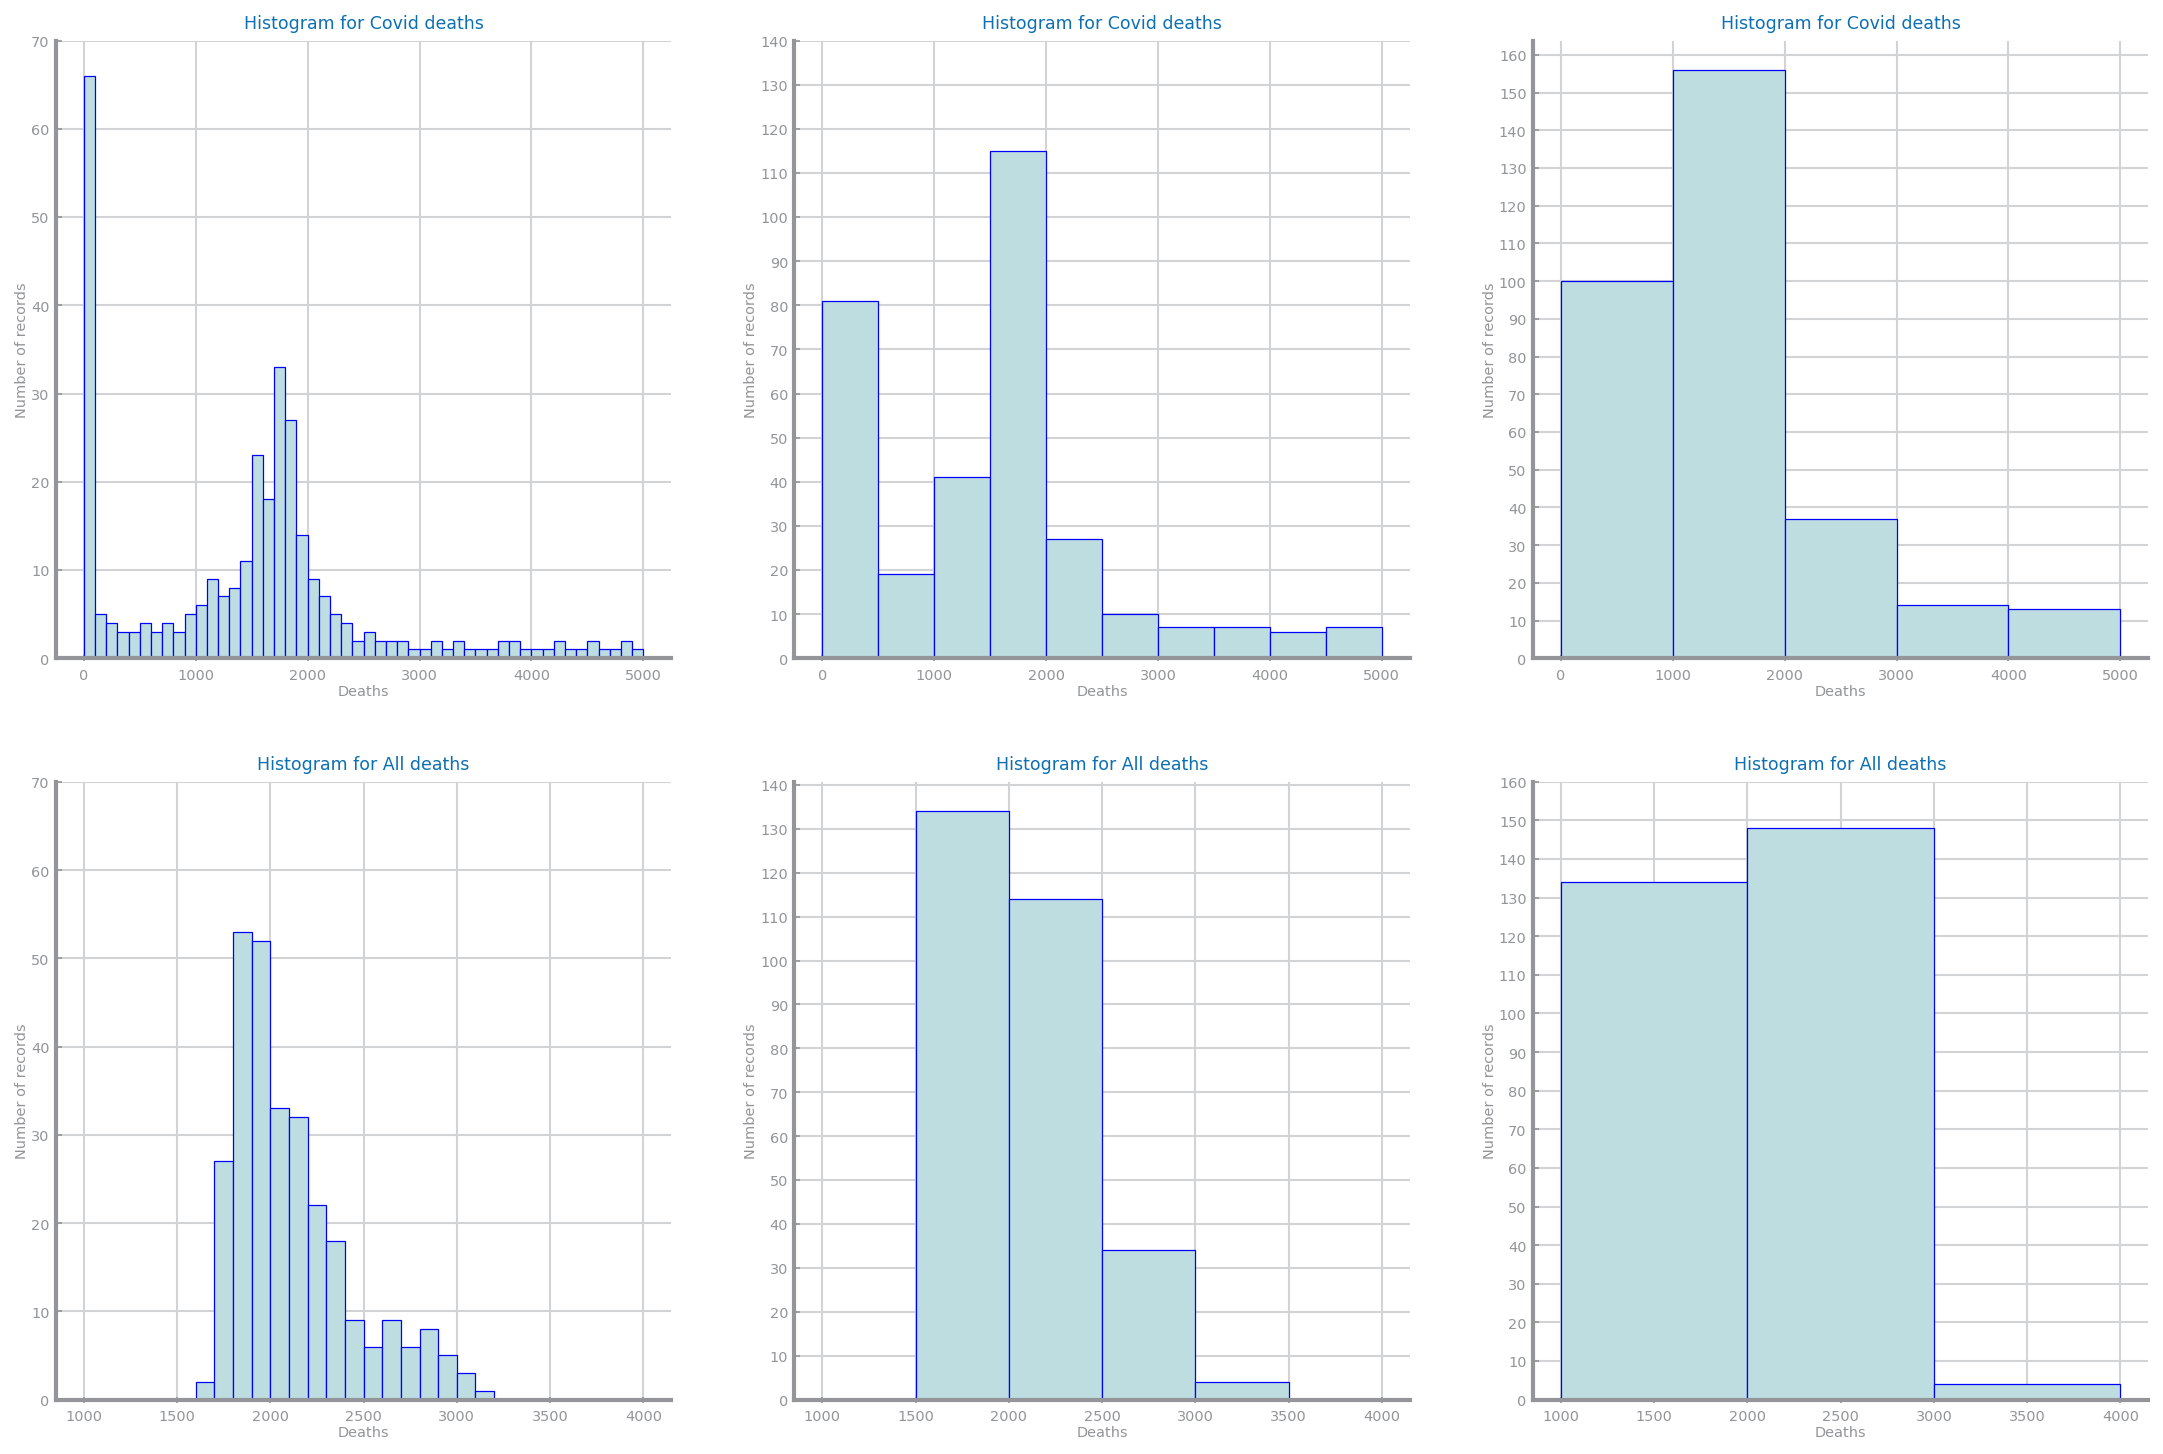

In [4]:
rows, cols = 2, 3
fig, axs = plt.subplots(rows, cols, figsize=(cols*6, rows*6))

### Covid
bins_step = (100, 500, 1000)
max_y = (75, 150, 170)
for j in range(3):
    axs[0,j].hist(covid['deaths'].values, range=[0, 5000], bins=np.arange(0, 5100, bins_step[j]), edgecolor="blue", linewidth=0.6)
    axs[0,j].set_yticks(np.arange(0, max_y[j], 10))
    axs[0,j].set_title('Histogram for Covid deaths')
    axs[0,j].set_xlabel('Deaths')
    axs[0,j].set_ylabel('Number of records')
    
### All deaths
bins_step = (100, 500, 1000)
max_y = (75, 150, 170)
for j in range(3):
    axs[1,j].hist(all_deaths['deaths'].values, range=[1000, 4000], bins=np.arange(1000, 4100, bins_step[j]), edgecolor="blue", linewidth=0.6)
    axs[1,j].set_yticks(np.arange(0, max_y[j], 10))
    axs[1,j].set_title('Histogram for All deaths')
    axs[1,j].set_xlabel('Deaths')
    axs[1,j].set_ylabel('Number of records')

# Stationarity

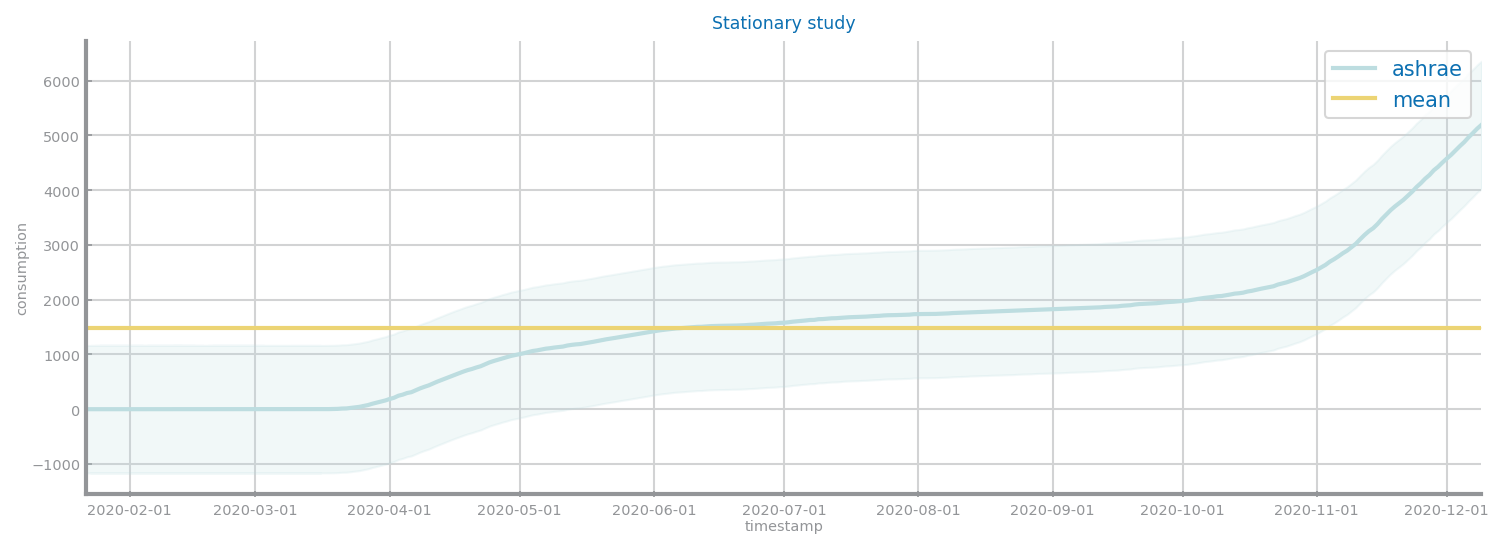

In [5]:
covid_series = pd.Series(covid['deaths'])

mean_line = pd.Series(np.ones(len(covid_series.values)) * covid_series.mean(), index=covid_series.index)
series = {'ashrae': covid_series, 'mean': mean_line}
plt.figure(figsize=(3*ts.HEIGHT, ts.HEIGHT))
ts.plot_series(series, x_label='timestamp', y_label='consumption', title='Stationary study', show_std=True)
plt.show()

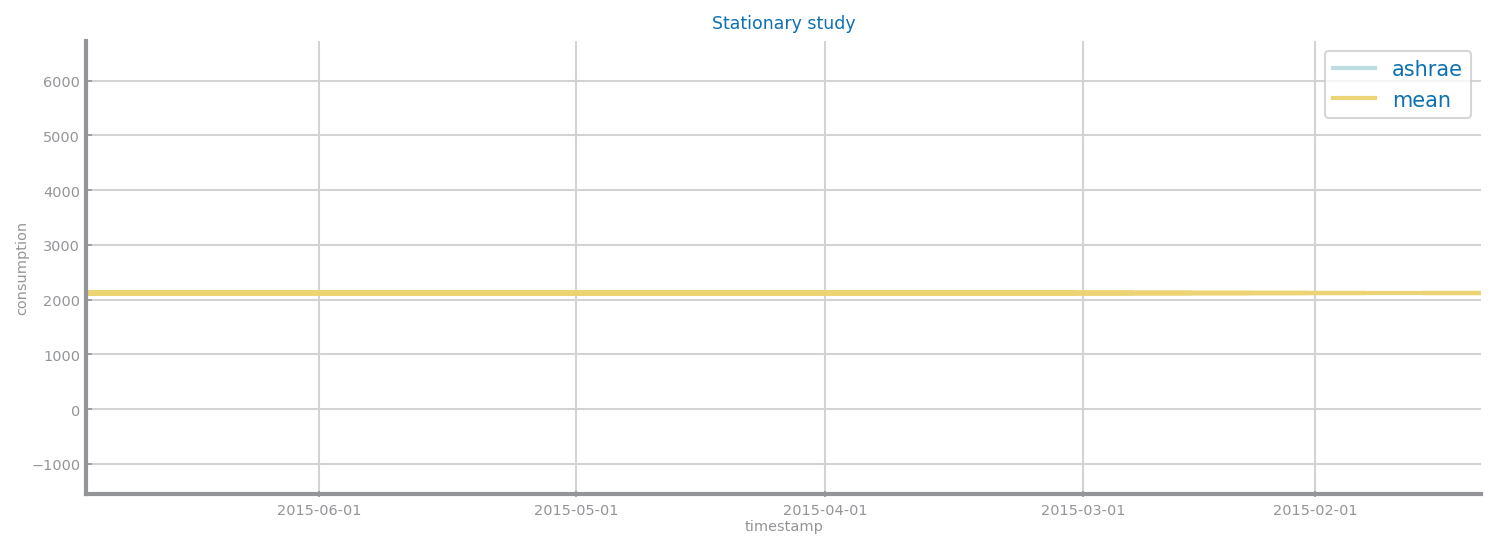

In [6]:
all_deaths_series = pd.Series(all_deaths['deaths'])

mean_line = pd.Series(np.ones(len(all_deaths_series.values)) * all_deaths_series.mean(), index=all_deaths_series.index)
series = {'ashrae': covid_series, 'mean': mean_line}
plt.figure(figsize=(3*ts.HEIGHT, ts.HEIGHT))
ts.plot_series(series, x_label='timestamp', y_label='consumption', title='Stationary study', show_std=True)
plt.show()

# Granularity

In [30]:
covid = covid.sort_index()
all_deaths = all_deaths.sort_index()

## Covid

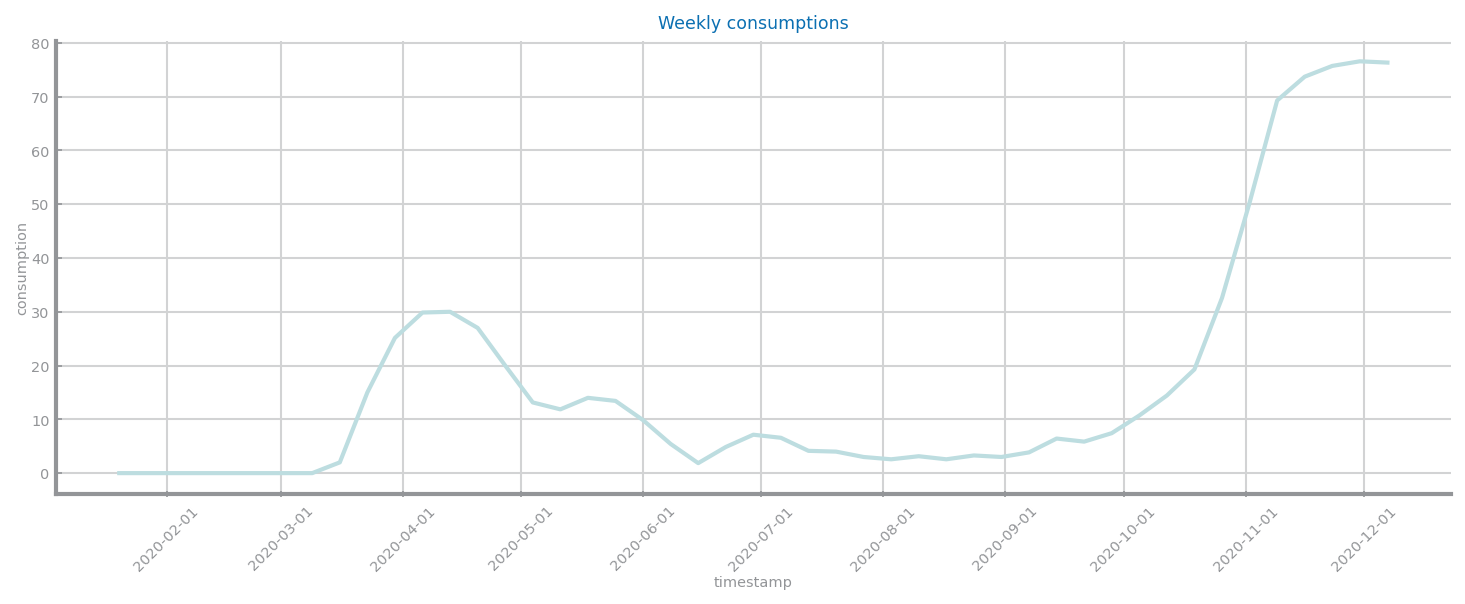

In [16]:
covid_copy = covid.copy()
covid_copy = covid_copy.diff()

index = covid_copy.index.to_period('W')
week_df = covid_copy.groupby(index).mean()
week_df['timestamp'] = index.drop_duplicates().to_timestamp()
week_df.set_index('timestamp', drop=True, inplace=True)
plt.figure(figsize=(3*ts.HEIGHT, ts.HEIGHT))
ts.plot_series(week_df, title='Weekly consumptions', x_label='timestamp', y_label='consumption')
plt.xticks(rotation = 45)
plt.show()

## All Deaths

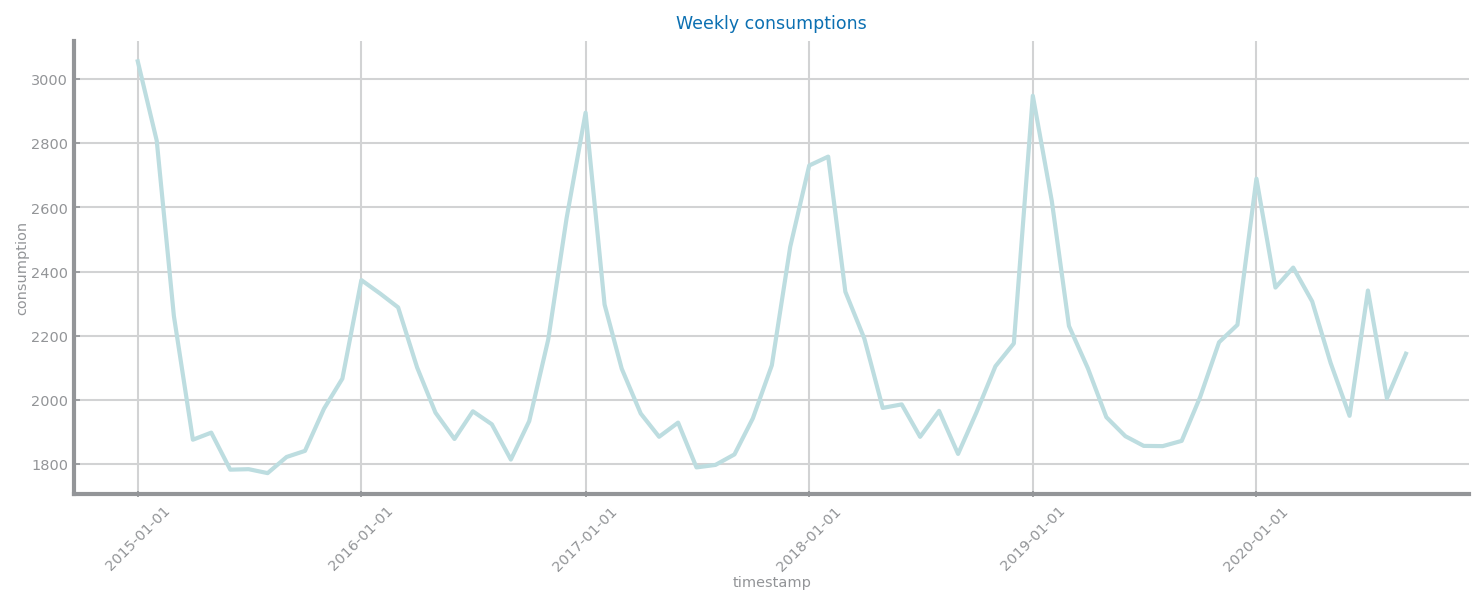

In [10]:
all_deaths_copy = all_deaths.copy()

index = all_deaths_copy.index.to_period('M')
week_df = all_deaths_copy.groupby(index).mean()
week_df['timestamp'] = index.drop_duplicates().to_timestamp()
week_df.set_index('timestamp', drop=True, inplace=True)
plt.figure(figsize=(3*ts.HEIGHT, ts.HEIGHT))
ts.plot_series(week_df, title='Weekly consumptions', x_label='timestamp', y_label='consumption')
plt.xticks(rotation = 45)
plt.show()

# Dimensionality

Nr. Records =  323
Nr. features =  1
First timestamp 2020-01-22 00:00:00
Last timestamp 2020-12-09 00:00:00


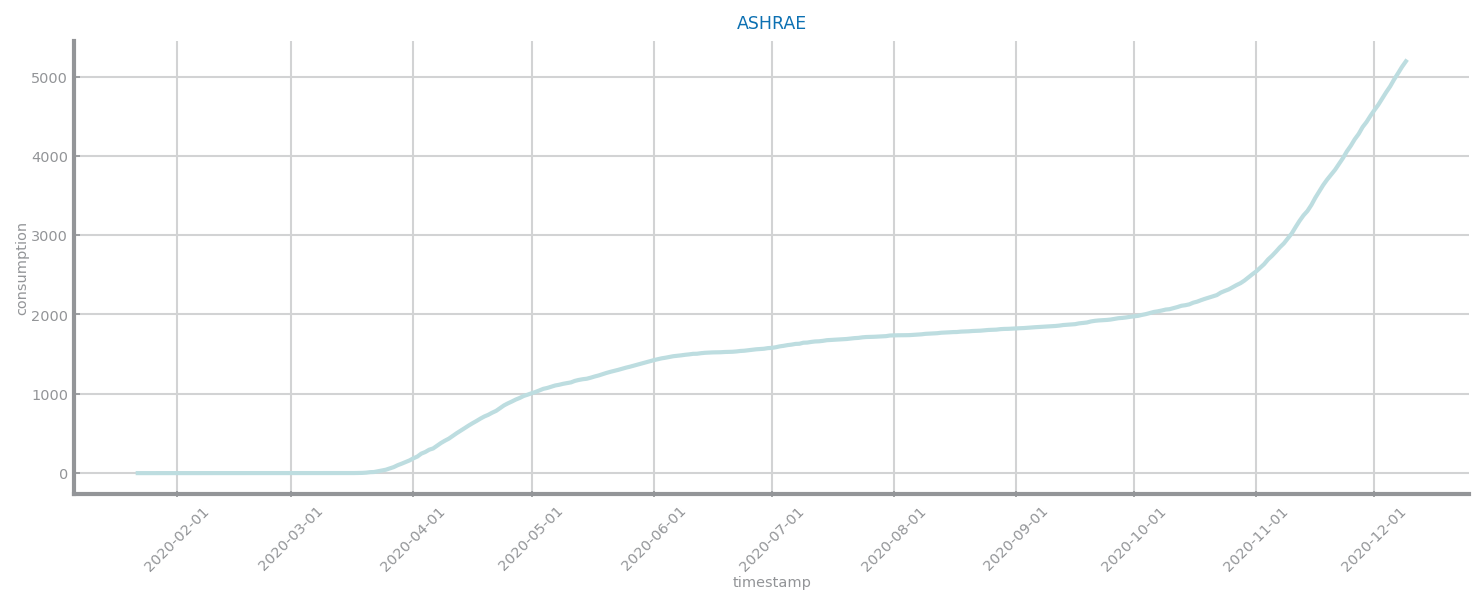

In [11]:
print("Nr. Records = ", covid.shape[0])
print("Nr. features = ", covid.shape[1])
print("First timestamp", covid.index[0])
print("Last timestamp", covid.index[-1])

plt.figure(figsize=(3*ts.HEIGHT, ts.HEIGHT))
ts.plot_series(covid, x_label='timestamp', y_label='consumption', title='ASHRAE')
plt.xticks(rotation = 45)
plt.show()

Nr. Records =  286
Nr. features =  1
First timestamp 2015-01-05 00:00:00
Last timestamp 2020-09-07 00:00:00


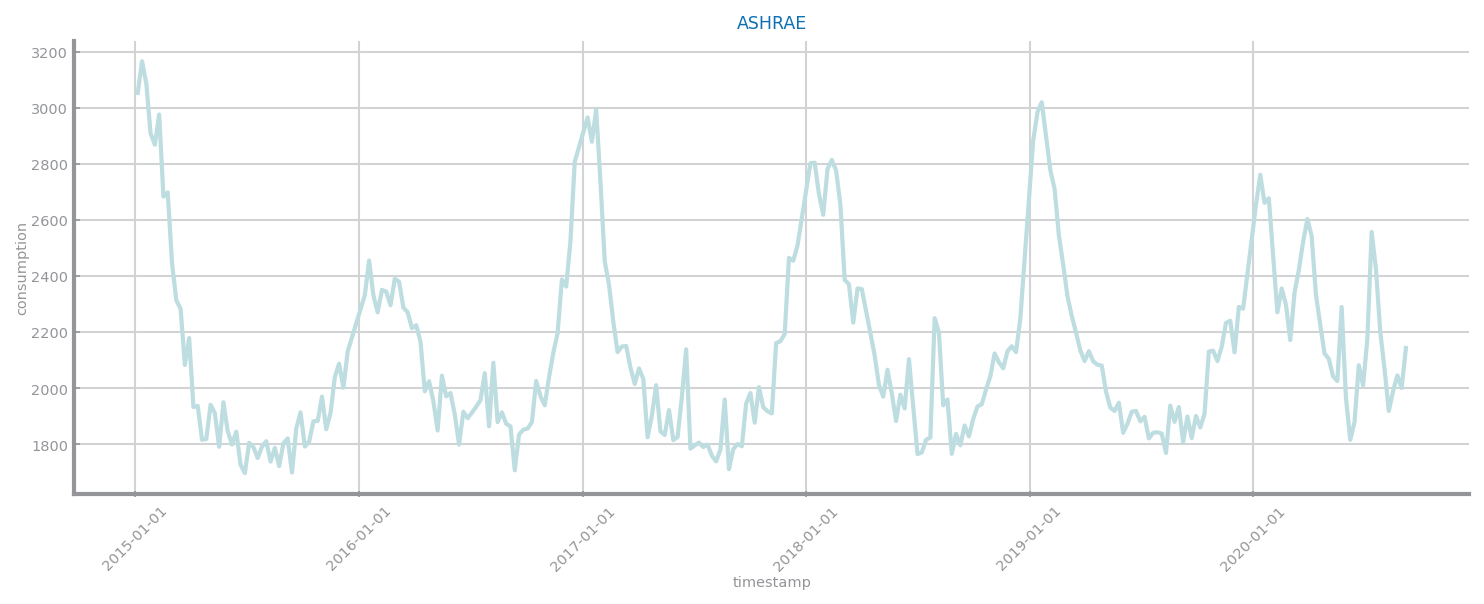

In [12]:
print("Nr. Records = ", all_deaths.shape[0])
print("Nr. features = ", all_deaths.shape[1])
print("First timestamp", all_deaths.index[0])
print("Last timestamp", all_deaths.index[-1])

plt.figure(figsize=(3*ts.HEIGHT, ts.HEIGHT))
ts.plot_series(all_deaths, x_label='timestamp', y_label='consumption', title='ASHRAE')
plt.xticks(rotation = 45)
plt.show()

# transformation

## smoothing

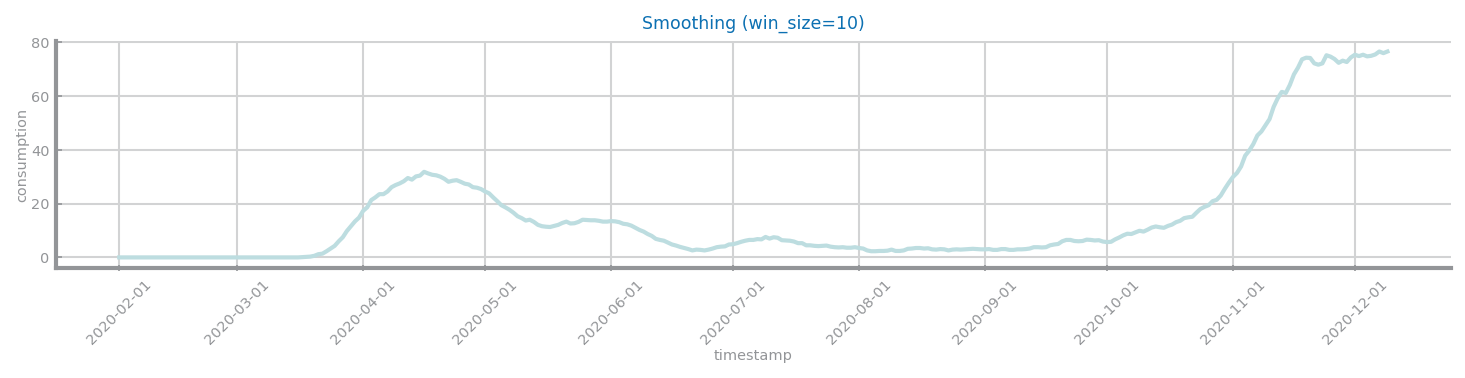

In [19]:
WIN_SIZE = 10
rolling = covid_copy.rolling(window=WIN_SIZE)
smooth_df = rolling.mean()
plt.figure(figsize=(3*ts.HEIGHT, ts.HEIGHT/2))
ts.plot_series(smooth_df, title=f'Smoothing (win_size={WIN_SIZE})', x_label='timestamp', y_label='consumption')
plt.xticks(rotation = 45)
plt.show()

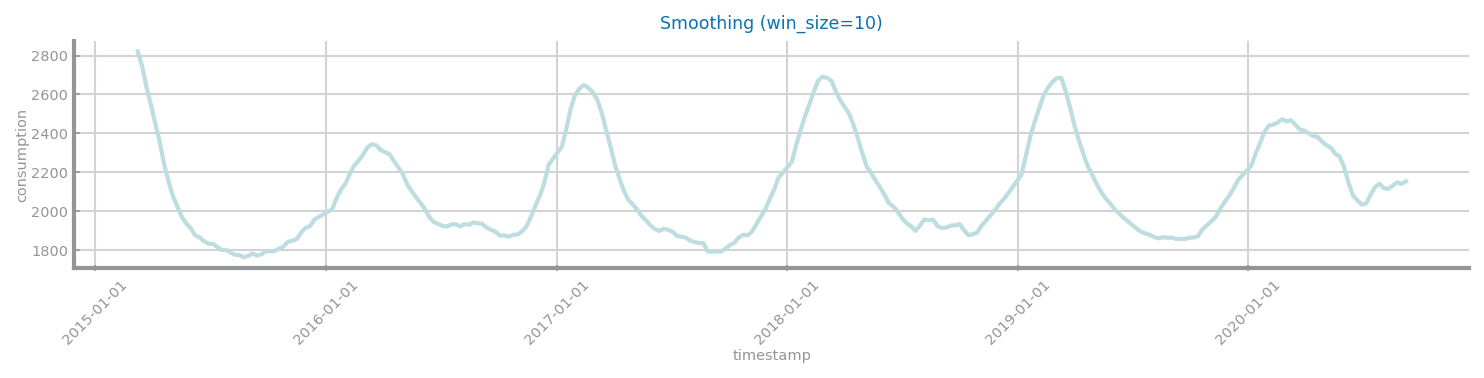

In [17]:
WIN_SIZE = 10
rolling = all_deaths.rolling(window=WIN_SIZE)
smooth_df = rolling.mean()
plt.figure(figsize=(3*ts.HEIGHT, ts.HEIGHT/2))
ts.plot_series(smooth_df, title=f'Smoothing (win_size={WIN_SIZE})', x_label='timestamp', y_label='consumption')
plt.xticks(rotation = 45)
plt.show()

## agregation

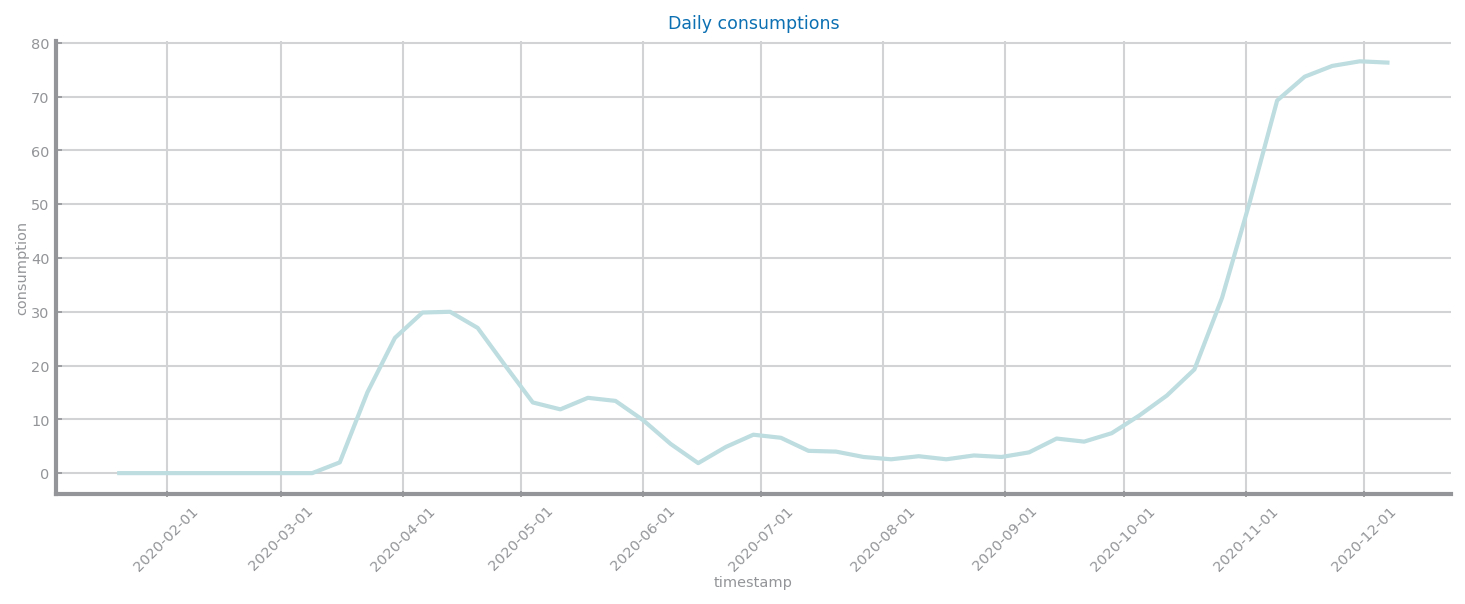

In [27]:
def aggregate_by(data: pd.Series, index_var: str, period: str, title: str = '', x_label: str = '', y_label: str = ''):
    index = data.index.to_period(period)
    agg_df = data.copy().groupby(index).mean()
    agg_df[index_var] = index.drop_duplicates().to_timestamp()
    agg_df.set_index(index_var, drop=True, inplace=True)
    ts.plot_series(agg_df, title=title, x_label=x_label, y_label=y_label)

plt.figure(figsize=(3*ts.HEIGHT, ts.HEIGHT))
aggregate_by(covid_copy, 'timestamp', 'W', title='Daily consumptions', x_label='timestamp', y_label='consumption')
plt.xticks(rotation = 45)
plt.show()

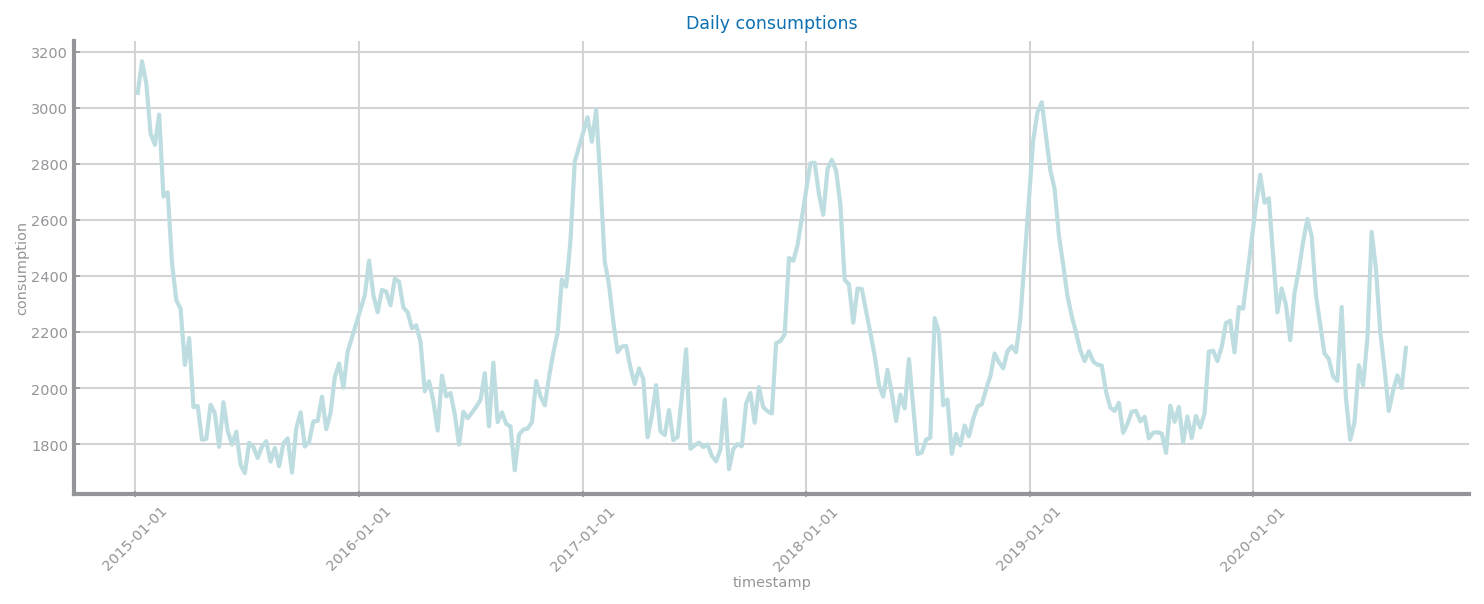

In [25]:
def aggregate_by(data: pd.Series, index_var: str, period: str, title: str = '', x_label: str = '', y_label: str = ''):
    index = data.index.to_period(period)
    agg_df = data.copy().groupby(index).mean()
    agg_df[index_var] = index.drop_duplicates().to_timestamp()
    agg_df.set_index(index_var, drop=True, inplace=True)
    ts.plot_series(agg_df, title=title, x_label=x_label, y_label=y_label)

plt.figure(figsize=(3*ts.HEIGHT, ts.HEIGHT))
aggregate_by(all_deaths, 'timestamp', 'W', title='Daily consumptions', x_label='timestamp', y_label='consumption')
plt.xticks(rotation = 45)
plt.show()

## differentiation

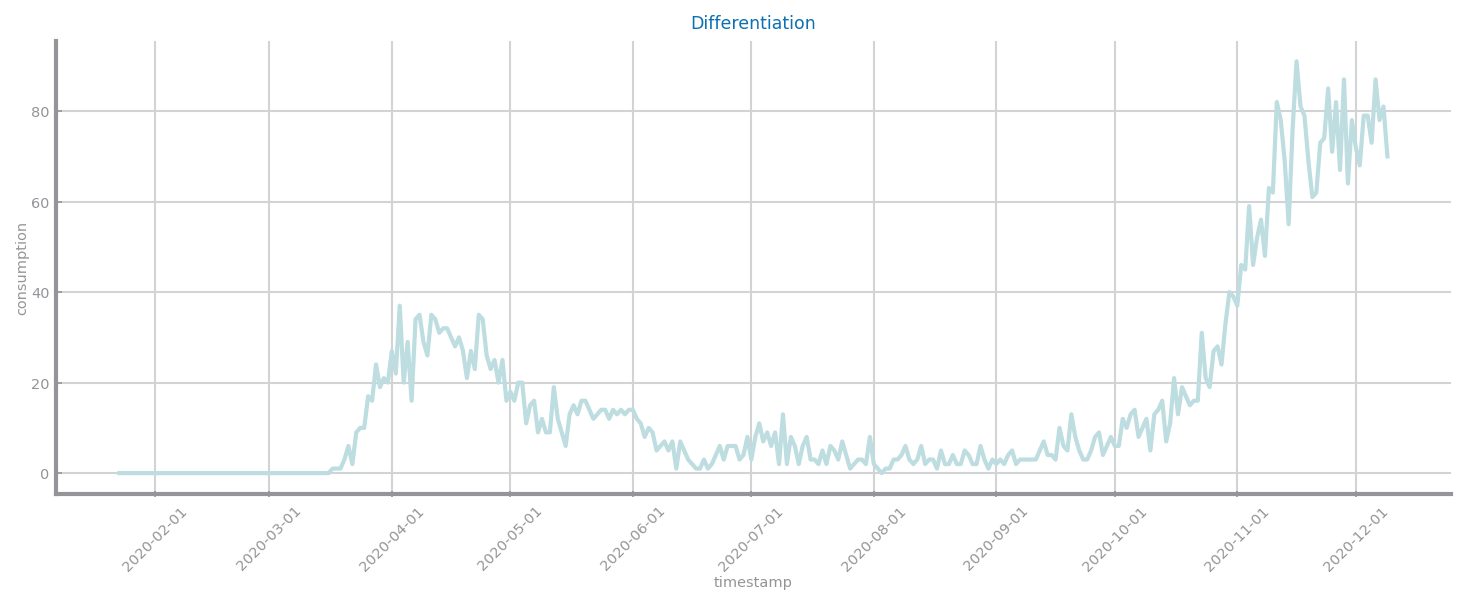

In [24]:
diff_df = covid.diff()
plt.figure(figsize=(3*ts.HEIGHT, ts.HEIGHT))
ts.plot_series(diff_df, title='Differentiation', x_label='timestamp', y_label='consumption')
plt.xticks(rotation = 45)
plt.show()